# <span style='color:blue'> <center>Supervised Learning</center> </span>
## **Chapter 2.** Regression
#### by **Ivan Alducin**
<p><img src="https://miro.medium.com/max/683/1*h6PuI6-PdPE8d4dTnhcg3w.png" width="1000"></p>

## Análisis Exploratorio
<p>Vamos a trabajar con el conjunto de datos de <code>Gapminder</code>. El objetivo será utilizar estos datos para predecir la esperanza de vida en un país determinado en función de características como el PIB, la tasa de fertilidad,la población del país, etc.

Dado que la variable objetivo aquí es cuantitativa, este es un problema de regresión. Por ahora usaremos una regresión lineal con una sola variable: <i>fertilidad</i>, que es el número promedio de hijos que da a luz una mujer en un país determinado. Para antes de proceder a crear nuestro primer modelo de regresion, tenemos que entender el contexto y que variables son las que afectan de manera directa al indice de esperanza de vida</p>

In [ ]:
# Conexiòn SQL en Google Colab
!pip install pyodbc

%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

In [6]:
# # Importa Pyodbc y los modulos necesarios para Anàlisis de Datos
import pyodbc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Parámetros de conexiòn a SQL
server   = 'server-training.database.windows.net' 
database = 'db_axm' 
username = 'axm_reader' 
password = 'careerp@th22*' 

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                      'SERVER='+ server +';'
                      'DATABASE='+ database +';'
                      'UID='+ username +';'
                      'PWD='+ password)

# Escribe una consulta para importar la tabla Gapminder en SQL
query = ("SELECT * FROM Gapminder")

# Importa la consulta a un DataFrame
df = pd.read_sql(query, conn)
df.head(5)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [7]:
query = (
"""SELECT 
        g.Region,
        AVG(g.life) AS life
    FROM
        dbo.Gapminder g
    GROUP BY
        g.Region"""
)

df = pd.read_sql(query, conn)
df.head(5)

,Region,life
0,America,73.840741
1,East Asia & Pacific,71.585714
2,Europe & Central Asia,76.034146
3,Middle East & North Africa,74.660000
4,South Asia,69.371429


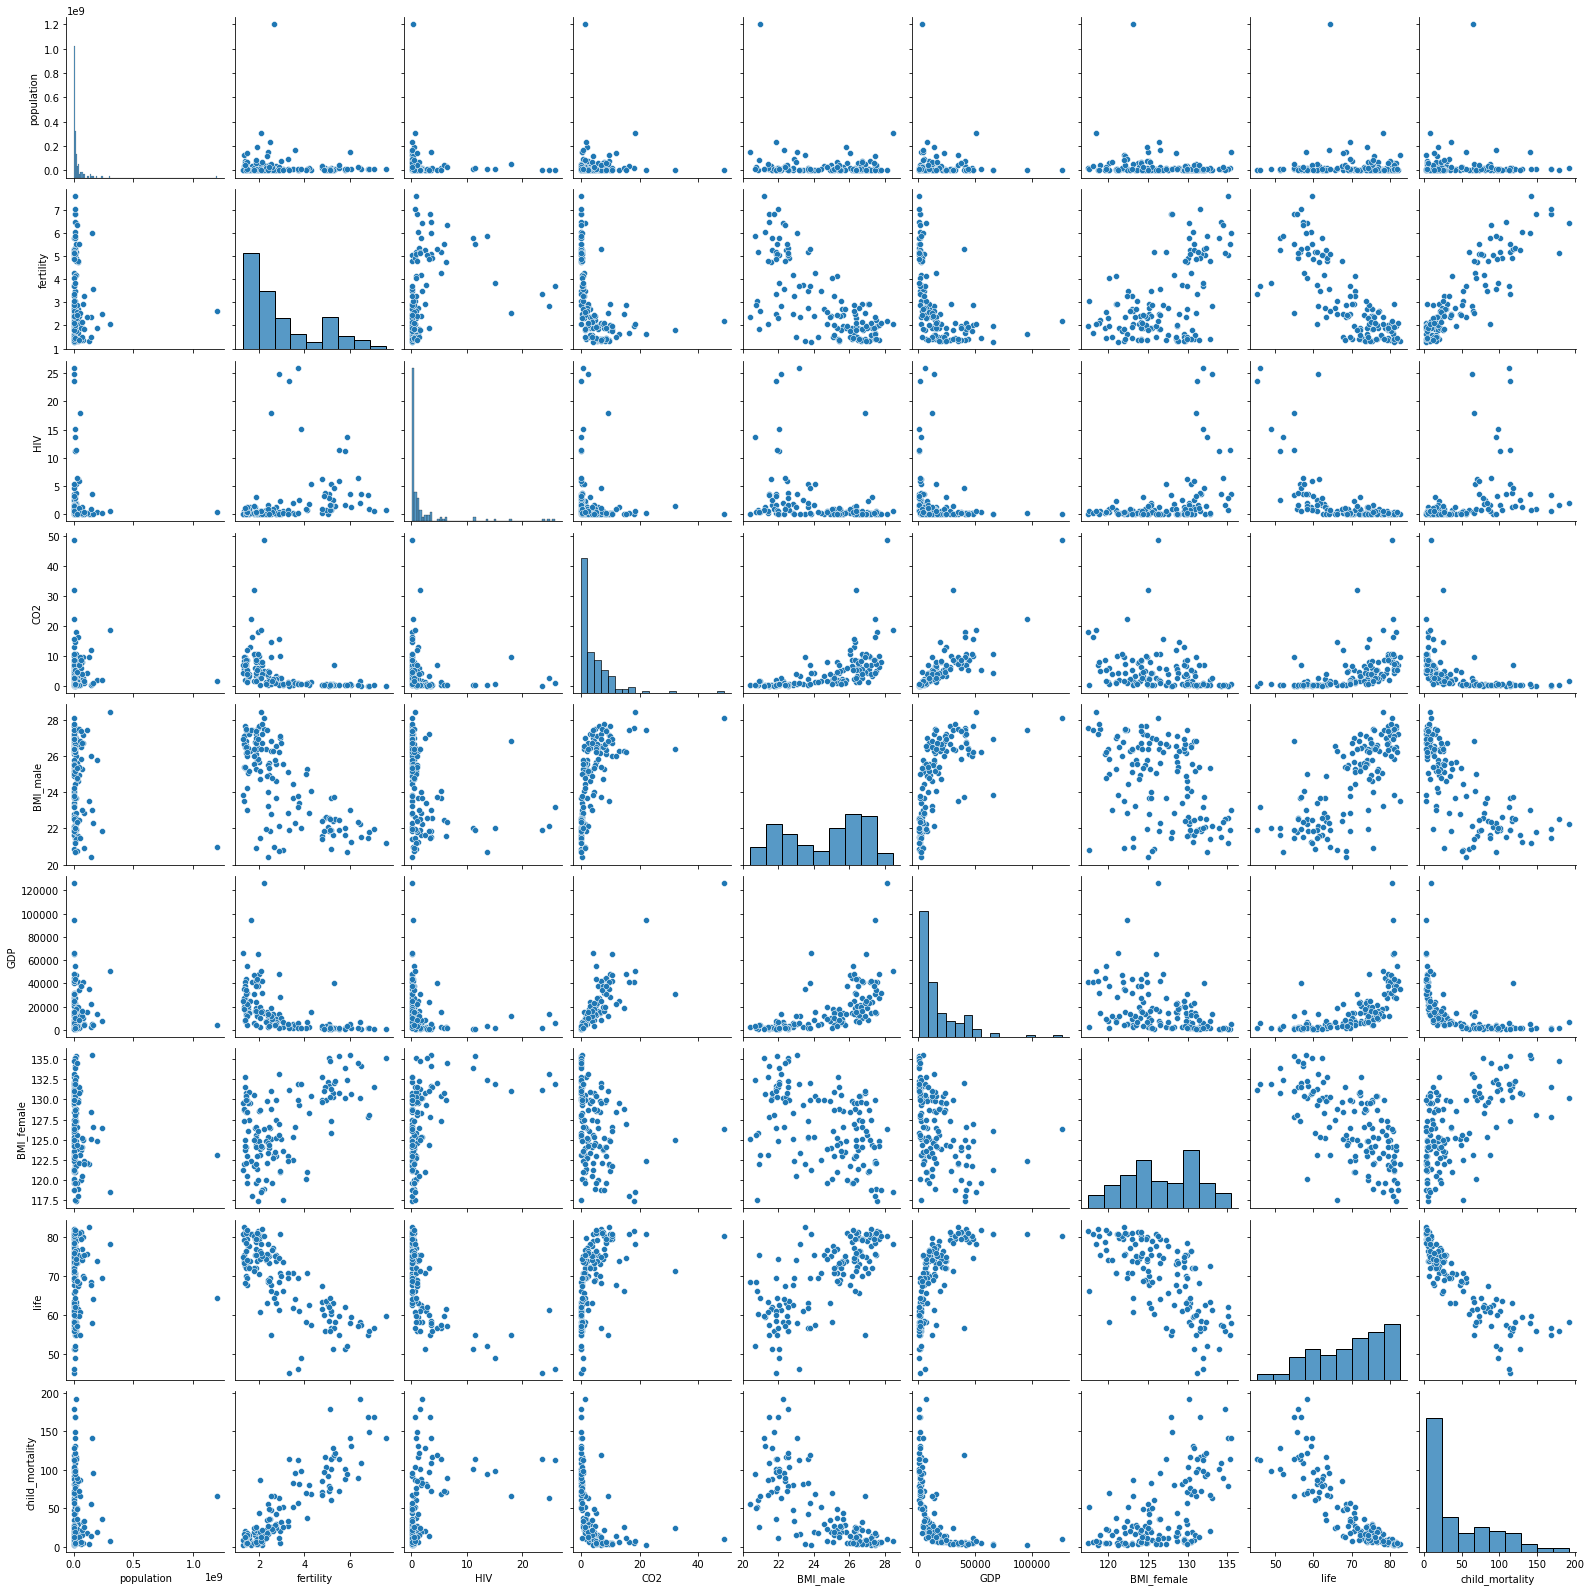

In [10]:
# Cuales son las variables que afectan a la esperanza de vida?
sns.pairplot(df)

m: -4.13 
b: 81.75
RMSE: 5.64


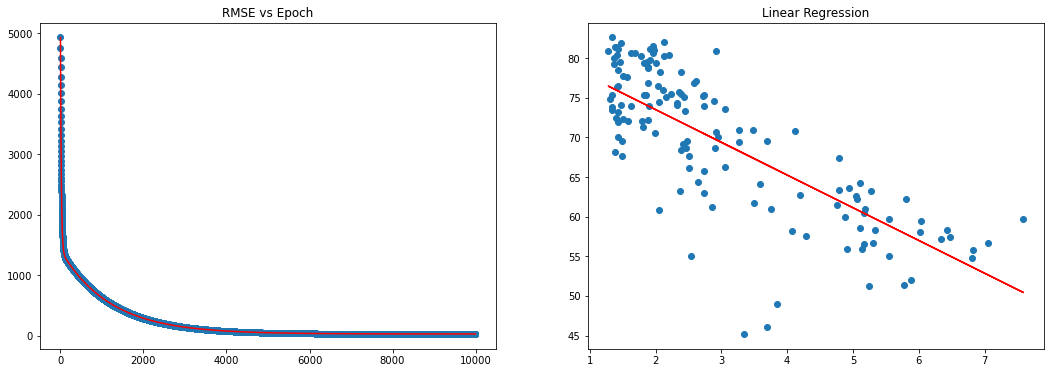

In [56]:
# -------------------------------------------------------------------
# ------------------------Gradiente Descendente-----------------------
# -------------------------------------------------------------------
m = 0
b = 0
R = []
X = df["fertility"].values
y = df["life"].values

#Asignación de pasos y repeticiones
L = 0.001
epochs = 10000

# Rango
n = int(len(X))

# Descenso de gradiente
for i in range(epochs): 
    y_pred = m * X + b
    gradient_m = (-2/n) * sum(X * (y - y_pred))
    gradient_b = (-2/n) * sum(y - y_pred)
    m = m - L * gradient_m
    b = b - L * gradient_b
    R.append(sum((y - y_pred)**2) / n)

y_pred = m * X + b

#Impresión de parámetros ajustados
print ("m: {:.2f}".format(m), "\nb: {:.2f}".format(b))
print("RMSE: {:.2f}".format(np.sqrt(np.min(R))))


# Gráficos
f, ax = plt.subplots(1, 2, figsize=(18,6))

ax[0].scatter(np.arange(0,10000), R)
ax[0].plot(np.arange(0,10000), R, "r")
ax[0].set_title("RMSE vs Epoch")

ax[1].scatter(X, y)
ax[1].plot(X, y_pred, color='red')
ax[1].set_title('Linear Regression')

plt.show()

In [5]:
X = df["fertility"].values
range(len(X))

range(0, 139)

## Coeficientes de Regresion
<p>El objetivo es predecir la recta de regresión que mejor se ajuste usando el método de mínimos cuadrados. Entonces, para encontrar eso, primero tenemos que encontrar la ecuación de tal recta. Entonces, si $y=mx+b$, donde <i>m</i> es la pendiente/sesgo que se denota por un cambio en <i>x</i> dividido por el cambio en <i>y</i>, y esta dada por la expresión denotada abajo. El objetivo de este ejercicio es estimar los coeficientes de la recta para poder crear un modelo de regresión para estimar la <i>Esperanza de Vida</i> con base en la <i>Fertilidad</i>:</p>. 
    
<img src="https://miro.medium.com/max/922/1*TLC7sUmnMCzCLz1qB5xfFg.gif" width="350">

In [10]:
# ----------------------------------------------------------------------
# ------------------------Coeficientes de Regresion---------------------
# ----------------------------------------------------------------------
X = df["fertility"].values
y = df["life"].values

# Promedio de Variable Dependiente y Variable Objetivo
mean_X = np.mean(X)
mean_y = np.mean(y)

# Coeficientes de regresion
N = len(X)
SSxy = 0
SSxx = 0
for i in range(N):
    SSxy += (X[i] - mean_X) * (y[i] - mean_y) 
    SSxx += (X[i] - mean_X) ** 2
m = SSxy / SSxx
b = mean_y - (m * mean_X)

# Error cuadratico medio
e = 0
for i in range(N):
    y_pred = m * X[i] + b
    e += ((y[i] - y_pred) **2) / N
rmse = np.sqrt(e)

# R-cuadrdada
ss_t = 0 
ss_r = 0 
for i in range(N): 
    y_pred = m * X[i] + b
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2
r2 = 1 - (ss_r / ss_t)

print("m: {:.2f}".format(m), "\nb: {:.2f}".format(b))
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

m: -4.44 
b: 82.96
RMSE: 5.61
R2: 0.62


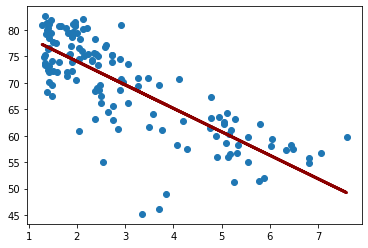

In [23]:
# Calcula la recta por medio de los estimadores encontrados
y_pred = m * X + b

# Crea un grafico de dispersión para la variables indepentiende y objetivo 
plt.scatter(X, y)

# Grafica también la recta de regresión
plt.plot(X, y_pred, color='darkred', linewidth=3)
plt.show()

## Regresión Lineal con scikit-learn
<p><i>"No hay que reinventar la rueda"</i>. La manera de trabajar la mayor parte de los algoritmos es por medio de librerías, por lo tanto ahora estimaremos los coeficientes de regresión utilizando <a href="https://scikit-learn.org/stable/">scikit-learn</a>. Un punto importante es que los datos se tienen que procesar para convertirlos en un array de 2 dimensiones, ya que este es el formato predeterminado con el que opera la librería <i>scikit-learn</i> (esto para modelos de regresión con 2 dimensiones), cuando. Para esto usaremos el método <code>.reshape()</code>. Asi como en los modelos de <i>Clasificación</i> existen metricas para calcular esto, en un modelo de <i>Regresión</i> podremos calcular su precisión por medio de los estadísticos <b>$R^2$</b> y el Error Cuadratico Medio (<b>RMSE</b>) para poder evaluar el modelo (Estos son algunos de ellos).

<img src="https://madhureshkumar.files.wordpress.com/2015/07/regressioncurv.png" width="350">

In [15]:
# Importa los modulos necesarios
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error

In [22]:
# Define la variable independiente ("fertility") y la variable objetivo ("life")
X = df["fertility"].values
y = df["life"].values

# Re-dimensionando la variable independiente, algo requerido en la configuración de datos de sklearn
X = X.reshape(-1, 1)

# Instancia el Regresor Lineal
reg = LinearRegression()

# Ajusta (Entrena) el regresor al conjunto de entrenamiento
reg.fit(X, y)

# Calcula las predicciones en el conjunto de prueba
y_pred = reg.predict(X)

# Calcula los estadísticos R^2 y RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Resultados 
print("R^2: {:.2f}".format(reg.score(X, y)))
print("RMSE: {:.2f}".format(rmse))

R^2: 0.62
RMSE: 5.61


## Train/Test
<p>No hay que olvidar crear los conjuntos de enetranamiento y prueba para poder verificar y cuantificar el nivel de predicción del modelo.</p>

In [19]:
from sklearn.model_selection import train_test_split

# Crea los arreglo de entrenamiento y prueba en una proporcion del 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

# Crea el Regresor Lineal
reg = LinearRegression()

# Ajusta el regresor al conjunto de entrenamiento
reg.fit(X_train, y_train)

# Calcula las predicciones en el conjunto de prueba
y_pred = reg.predict(X_test)

# Calcula los estadísticos R^2 y RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R^2: {:.2f}".format(reg.score(X_test, y_test)))
print("RMSE: {:.2f}".format(rmse))
print("Slope: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

R^2: 0.53
RMSE: 6.56
Slope: [-4.50280811]
Intercept: 83.09496607243787


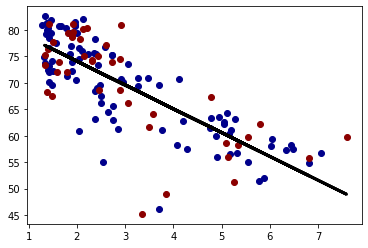

In [20]:
# Grafica los puntos de dispersión y la Linea de Regresión
plt.scatter(X_train, y_train, color='darkblue')
plt.scatter(X_test, y_test, color='darkred')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.show()

In [44]:
# Ahora crea un Regresor Lineal incluyendo todas las variables (númericas)
X = df.drop(['life', 'Region'], axis=1)
y = df["life"]

# Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

# Regresor
reg = LinearRegression()

# Fit
reg.fit(X_train, y_train)

# Predicción
y_pred = reg.predict(X_test)

# Estadísticos R^2 y RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Resultados
print("R^2: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9087510468946454
Root Mean Squared Error: 2.875315755232253


## Significancia y supuestos de Regresión
<p>Dentro de un modelo de regresión es importante estudiar la significancia de nuestras variables ya que esto nos dará mayor información y un mayor detalle para poder potenciar el nivel de predicción. Así mismo es muy importante verificar los supuestos del modelo de regresión ya que la violación de estos pueden llevarnos a la no consecución de un efecto casual</p>

In [7]:
import statsmodels.api as sm

# Reporte de Regresion
x_report = sm.add_constant(X_train)
est = sm.OLS(y_train, x_report).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           2.60e-24
Time:                        11:45:25   Log-Likelihood:                -296.54
No. Observations:                  97   AIC:                             597.1
Df Residuals:                      95   BIC:                             602.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.0950      1.121     74.158      0.0

In [46]:
# Multicolinearidad
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
vif,1.18915,30.398308,1.51266,3.875889,293.267198,4.691122,335.109997,15.394125


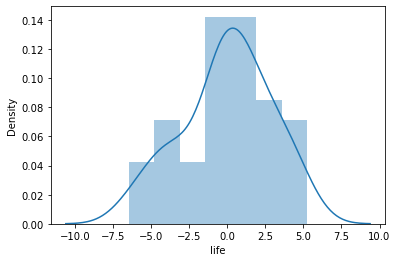

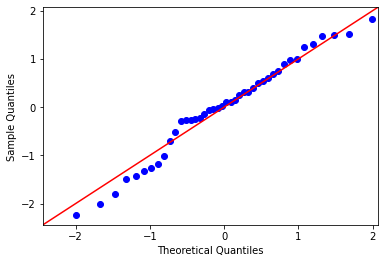

In [47]:
# Residuales
import scipy.stats as stats
residual = y_test - y_pred
sns.distplot(residual)

fig = sm.qqplot(residual, stats.t, fit=True, line="45")

En esta gráfica blavlavla

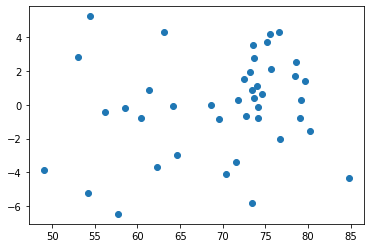

In [48]:
# Homocedasticidad
plt.scatter(y_pred, residual)

## Cross Validation
<p>La validación cruzada es un paso vital en la evaluación de un modelo. Maximiza la cantidad de datos que se utilizan para entrenar el modelo, ya que durante el entrenamiento, el modelo no solo se entrena, sino que también se prueba en todos los datos disponibles.</p>

In [ ]:
r2 = []
for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=i)
  reg = LinearRegression()  
  reg.fit(X_train, y_train)
  r2.append(reg.score(X_train, y_train))

plt.hist(r2)
plt.show()

In [49]:
# Importa los modulos necesarios
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Crea el Regresor Lineal
reg = LinearRegression()

# Crea una validación cruzada de 5 niveles usa los conjuntos de entrenamiento creados anteriormente
cv_scores = cross_val_score(reg, X_train, y_train, cv = 5)

# Imprime los resultados de la validación cruzada
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(cv_scores.mean()))

[0.87879646 0.84319648 0.92032436 0.52926945 0.74174686]
Average 5-Fold CV Score: 0.7826667240310995


In [50]:
# Que pasa si incremento el parametro k- para mi k-fold?
# 3-fold CV
cvscores_3 = cross_val_score(reg, X_train, y_train, cv = 3)
print(np.mean(cvscores_3))

# 10-fold CV
cvscores_10 = cross_val_score(reg, X_train, y_train, cv = 10)
print(np.mean(cvscores_10))

0.8195023448502835
0.780672750991023


## Regularizacion: Lasso
<p>La regularización <i>Lasso</i> penaliza y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero. Su capacidad para realizar la selección de características de esta manera se vuelve aún más útil cuando se trata con datos que involucran miles de variables. En este ejercicio vamos a crear una Regresion Lasso, y encontrará sque los coeficientes de algunas características se reducen a 0, y solo quedan las más importantes.</p>

In [51]:
# Importa la librería de Lasso
from sklearn.linear_model import Lasso

In [52]:
# Crea un regresor Lasso con paramaetro alpha=0.4
lasso = Lasso(alpha=0.4, normalize=True)

# Ajusta el regresor a los datos de entrenamiento
lasso.fit(X_train, y_train)

# Calcula las predicciones en el conjunto de prueba
y_pred = lasso.predict(X_test)

# Calcula el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 6.20345472944179


[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.08550838]


<AxesSubplot:>

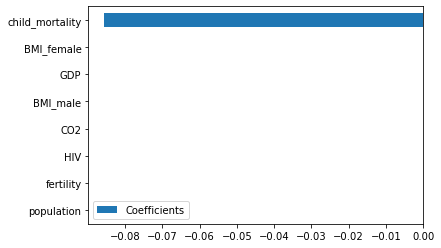

In [53]:
# Imprime los valores de los coeficientes de la Regresion Lasso
lasso_coef = lasso.coef_
print(lasso_coef)

# Grafica los coeficientes con el nombre de la variable
coeff = pd.DataFrame(lasso.coef_, X_train.columns, columns=['Coefficients']).sort_values('Coefficients', ascending=False)
coeff.plot(kind='barh')

## Regularizacion: Ridge
<p>Lasso realiza la regularización agregando a la función de pérdida un término de penalización del valor absoluto de cada coeficiente multiplicado por algún alfa. Esto también se conoce como regularización $L1$ porque el término de regularización es la norma de los coeficientes. Sin embargo, esta no es la única forma de regularizar. Lasso es ideal para la selección de variables representativas, pero al crear modelos de regresión, Ridge debería ser la primera opción. En este ejercicio, vamos a ajustar el modelo de regresión Ridge en un rango de diferentes alfas con validación cruzada para cada uno, utilizando esta función que hemos definido para ti, que traza el puntaje y el error estándar para cada alfa, pero antes de eso, vamos a comparar los coeficientes para ver la diferencia entre los dos tipos de regresión</p>

Root Mean Squared Error: 3.421994804174517


<AxesSubplot:>

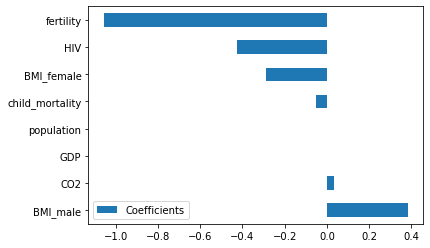

In [54]:
# Importar modulos necesarios
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instancia un regresor Ridge on un parametro alpha = 0.4 y visualiza los coeficientes de la variables
ridge = Ridge(alpha=0.4, normalize=True)

# Ajusta el regresor a los datos
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

# Calcula el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

coeff = pd.DataFrame(ridge.coef_, X_train.columns, columns=['Coefficients']).sort_values('Coefficients', ascending=False)
coeff.plot(kind='barh')

In [55]:
# Funcion para graficar indicadores alfa
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(10)
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

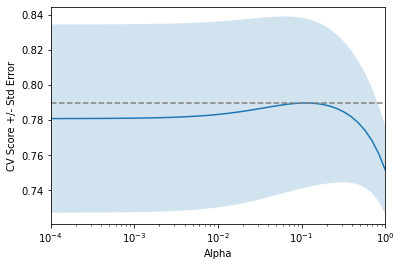

In [56]:
# Configuración de arrays para variar los parámetros
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Crear un regresor Ridge
ridge = Ridge(normalize = True)

# Vamos a calcular los indicadores sobre los paramateros alfa
for alpha in alpha_space:

    # Aquí va el iterador alpha
    ridge.alpha = alpha
    
    # Crear un 10-fold cross validation
    ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv = 10)
    
    # Adjunta la media al indicador
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Adjunta la desviacion estandar al indicador
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Grafico de los indicadores de los parametros alfa
display_plot(ridge_scores, ridge_scores_std)